In [1]:
%matplotlib inline

In [2]:
# Import Libraries
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns     
from sklearn.pipeline import make_pipeline
import numpy as np               

In [3]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  

In [4]:
# Load Dataset
df = pd.read_csv("Resume.csv")

print(f"Number of rows: {df.shape[0]}")

print("\nFirst 5 rows of the dataset:")
print(df.head())


Number of rows: 2484

First 5 rows of the dataset:
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  


In [5]:
# Data Preprocessing
df = df[['Resume_str', 'Category']]
df = df.dropna()
df['Resume'] = df['Resume_str'].astype(str)

# Text Preprocessing Function
def clean_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

df['Cleaned_Resume'] = df['Resume'].apply(clean_text)


In [6]:
# Check class distribution
print(df['Category'].value_counts())

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


In [7]:
# Get the category counts
category_counts = df['Category'].value_counts()

# Filter categories with count >= 100
valid_categories = category_counts[category_counts >= 100].index

# Keep only rows with valid categories
df = df[df['Category'].isin(valid_categories)]

# Check updated category distribution
print(df['Category'].value_counts())

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
ENGINEERING               118
ACCOUNTANT                118
CHEF                      118
FINANCE                   118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
Name: count, dtype: int64


In [8]:
# Features and Target
X = df['Cleaned_Resume']
y = df['Category']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [9]:
# Train Models
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

====== Decision Tree ======
Accuracy: 0.6636
F1 Score (Macro): 0.6639
F1 Score (Weighted): 0.6624
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.72      0.76      0.74        17
              ADVOCATE       0.64      0.52      0.57        27
                  ARTS       0.35      0.47      0.40        19
              AVIATION       0.64      0.75      0.69        24
               BANKING       0.57      0.47      0.52        34
  BUSINESS-DEVELOPMENT       0.70      0.83      0.76        23
                  CHEF       0.79      0.75      0.77        20
          CONSTRUCTION       0.81      0.88      0.84        24
            CONSULTANT       0.55      0.57      0.56        21
              DESIGNER       0.88      0.75      0.81        20
           ENGINEERING       0.67      0.72      0.69        25
               FINANCE       0.78      0.88      0.82        24
               FITNESS       0.57      0.62  

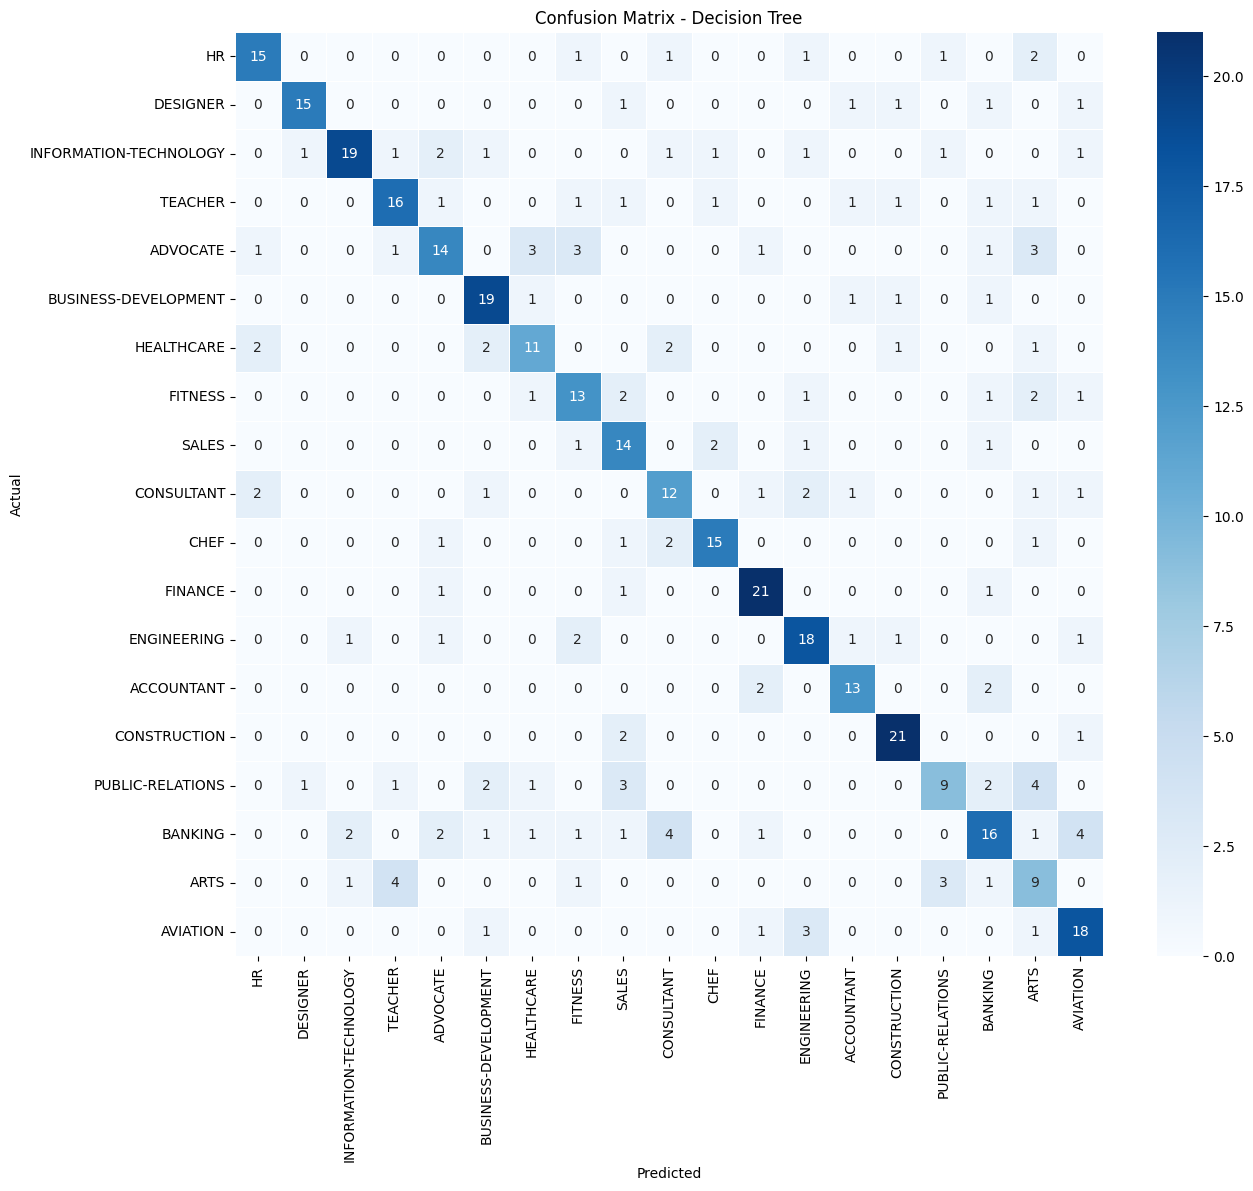

====== SVM ======
Accuracy: 0.6866
F1 Score (Macro): 0.6879
F1 Score (Weighted): 0.6893
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.73      0.94      0.82        17
              ADVOCATE       0.48      0.56      0.52        27
                  ARTS       0.54      0.79      0.64        19
              AVIATION       0.83      0.62      0.71        24
               BANKING       0.79      0.56      0.66        34
  BUSINESS-DEVELOPMENT       0.77      0.87      0.82        23
                  CHEF       0.75      0.75      0.75        20
          CONSTRUCTION       0.91      0.83      0.87        24
            CONSULTANT       0.22      0.24      0.23        21
              DESIGNER       0.88      0.70      0.78        20
           ENGINEERING       0.64      0.72      0.68        25
               FINANCE       0.89      0.71      0.79        24
               FITNESS       0.88      0.67      0.76  

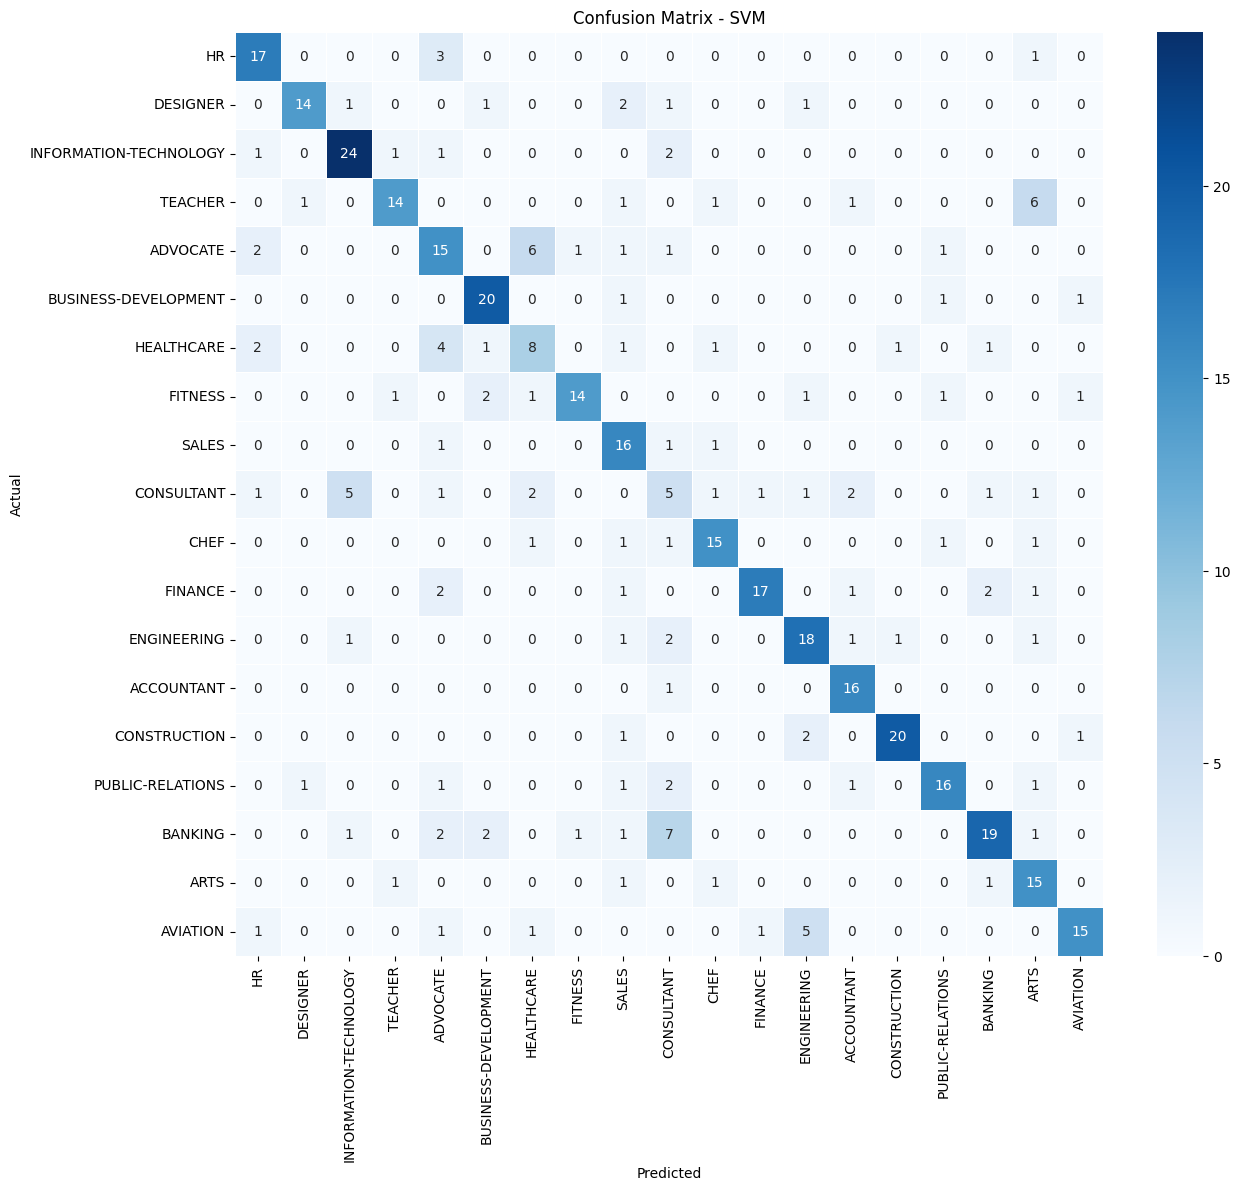

====== Logistic Regression ======
Accuracy: 0.6982
F1 Score (Macro): 0.6904
F1 Score (Weighted): 0.6942
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.71      0.88      0.79        17
              ADVOCATE       0.58      0.52      0.55        27
                  ARTS       0.57      0.63      0.60        19
              AVIATION       0.89      0.67      0.76        24
               BANKING       0.79      0.65      0.71        34
  BUSINESS-DEVELOPMENT       0.75      0.91      0.82        23
                  CHEF       0.75      0.75      0.75        20
          CONSTRUCTION       0.92      0.92      0.92        24
            CONSULTANT       0.31      0.19      0.24        21
              DESIGNER       0.79      0.75      0.77        20
           ENGINEERING       0.61      0.76      0.68        25
               FINANCE       0.86      0.75      0.80        24
               FITNESS       0.80      

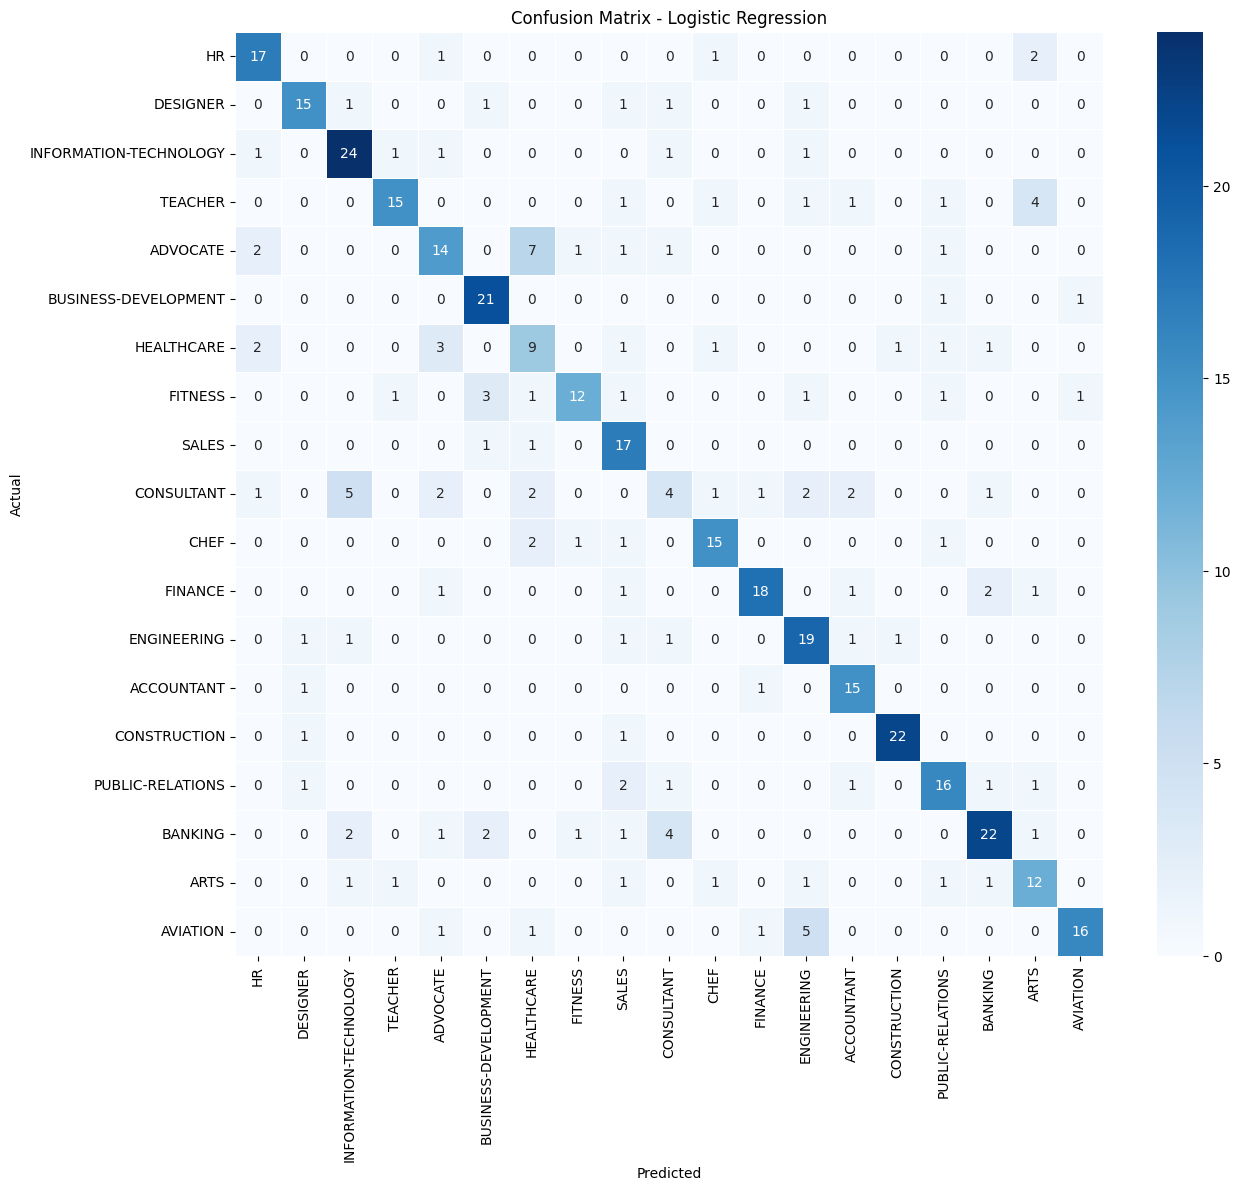

====== Random Forest ======
Accuracy: 0.7627
F1 Score (Macro): 0.7520
F1 Score (Weighted): 0.7555
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.63      1.00      0.77        17
              ADVOCATE       0.88      0.52      0.65        27
                  ARTS       0.73      0.42      0.53        19
              AVIATION       0.83      0.83      0.83        24
               BANKING       0.84      0.62      0.71        34
  BUSINESS-DEVELOPMENT       0.72      0.91      0.81        23
                  CHEF       0.76      0.80      0.78        20
          CONSTRUCTION       0.96      0.96      0.96        24
            CONSULTANT       0.78      0.33      0.47        21
              DESIGNER       0.94      0.85      0.89        20
           ENGINEERING       0.73      0.88      0.80        25
               FINANCE       0.95      0.83      0.89        24
               FITNESS       0.88      0.71  

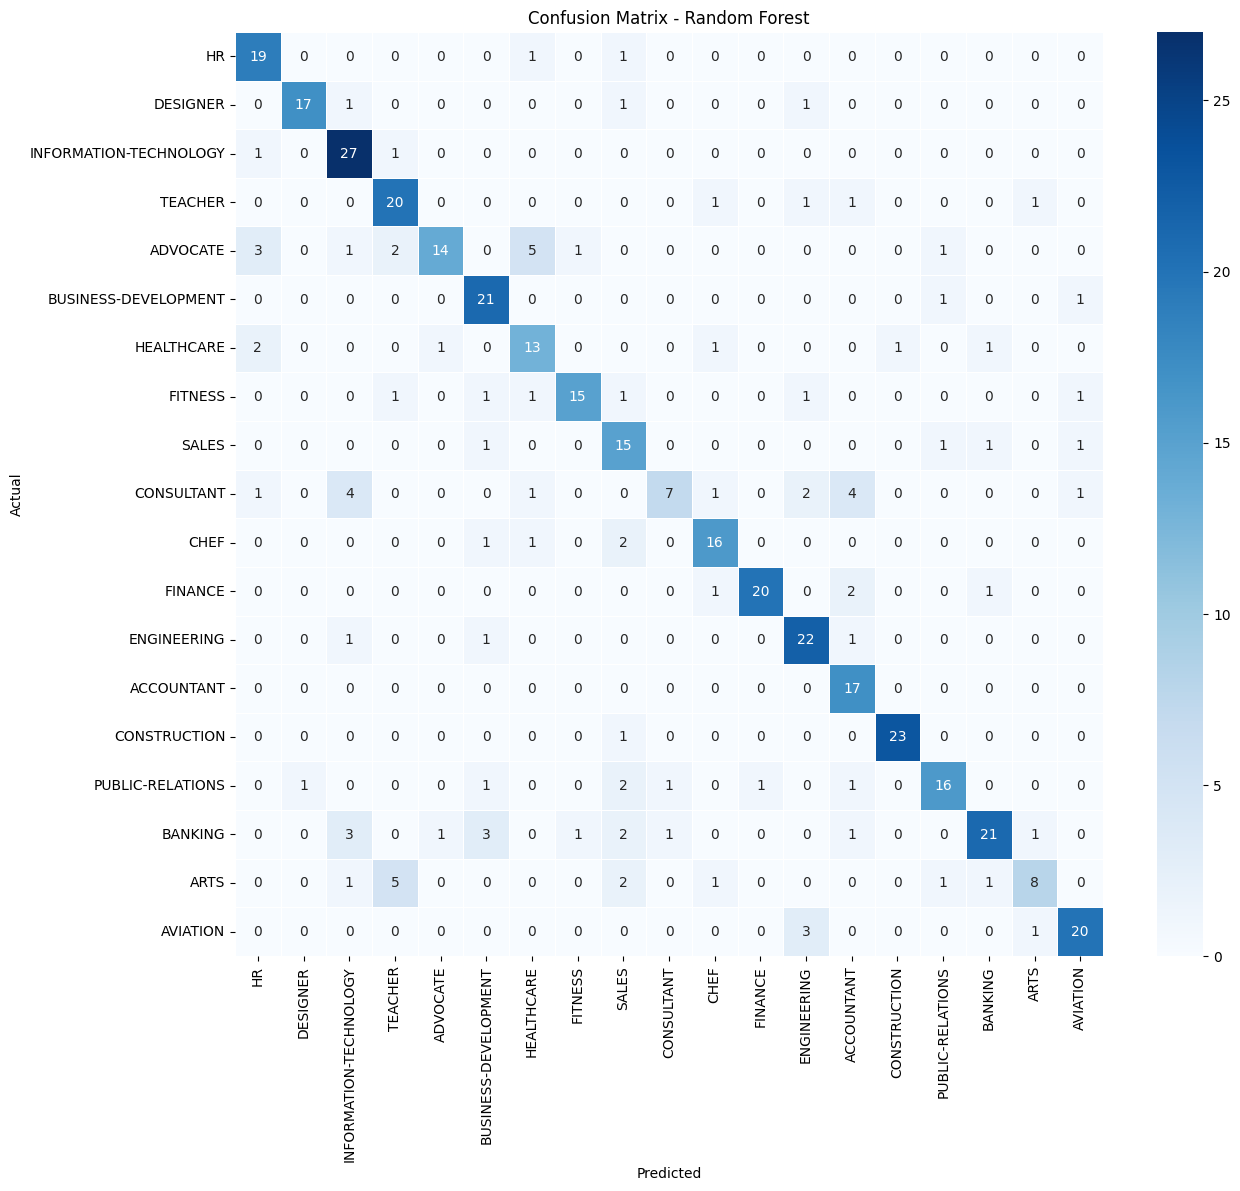

In [10]:
# Evaluate Models

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1_macro = f1_score(y_test, preds, average='macro')
    f1_weighted = f1_score(y_test, preds, average='weighted')
    results[name] = {
        "Accuracy": acc,
        "F1_macro": f1_macro,
        "F1_weighted": f1_weighted
    }
    print(f"====== {name} ======")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (Macro): {f1_macro:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}")
    print("Classification Report:\n", classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds, labels=y.unique())
    plt.figure(figsize=(14, 12))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique(), cmap="Blues", linewidths=.5)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [11]:
# 5-Fold Cross-Validation

print("\n====== Cross-Validation (5-Fold) ======")
for name, model in models.items():
    pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1,2), max_features=5000), model)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"=== {name} ===")
    print(f"Fold Accuracies: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")
    print(f"Standard Deviation: {np.std(scores):.4f}\n")


====== Cross-Validation (5-Fold) ======
=== Decision Tree ===
Fold Accuracies: [0.71198157 0.68202765 0.6843318  0.6843318  0.55299539]
Mean Accuracy: 0.6631
Standard Deviation: 0.0562

=== SVM ===
Fold Accuracies: [0.74193548 0.74193548 0.71428571 0.67741935 0.62211982]
Mean Accuracy: 0.6995
Standard Deviation: 0.0454

=== Logistic Regression ===
Fold Accuracies: [0.75806452 0.73502304 0.71889401 0.6843318  0.61981567]
Mean Accuracy: 0.7032
Standard Deviation: 0.0481

=== Random Forest ===
Fold Accuracies: [0.84792627 0.81336406 0.78341014 0.73732719 0.69585253]
Mean Accuracy: 0.7756
Standard Deviation: 0.0539



In [13]:
# Choosing best model

best_model = models["Random Forest"]

In [14]:
# Resume Category Prediction Function
def predict_resume_category(resume_text):
    # Clean using spaCy
    cleaned_text = clean_text(resume_text)
    # Vectorize using the same TF-IDF
    vectorized_text = tfidf.transform([cleaned_text])
    # Predict
    predicted_category = best_model.predict(vectorized_text)[0]
    return predicted_category

In [15]:
# === Test Examples ===

# Resume Samples and Examples To Inspire Your Next Application. 
# Indeed Career Guide - Resume Samples. 
# Retrieved June 6, 2025 from https://www.indeed.com/career-advice/resume-samples

# information technology
example_resume_1 = """
Summary
Experienced IT security professional with over 10 years of experience in developing secure networks, completing network security audits and providing custom solutions to customers to increase data and network security. Skilled in troubleshooting technical issues, completing detailed system reviews, researching new security solutions and learning about new security measures. The dedication to managing and updating customer computer and network security systems has resulted in zero security incidents.
Education
Blue River Technical Institute
Master's in information security
Experience
Yellow Valley Technologies | Pittsburgh, PA, IT Security Analyst
March 2017 – Current
Conduct audits on customer network systems to verify compliance with regulatory requirements and identify system deficiencies
Create custom solutions for customers according to requirements and network infrastructures to improve network security and operation
Apply security updates to over 30 customers to ensure optimal security levels
Provide advice to upper management regarding network security and auditing services
Troubleshoot customer networks to identify problems and develop solutions to restore customer network functions
Holland & Wright Network Security | Philadelphia, PA, IT Security Analyst
May 2007 – January 2017
Documented customer network configurations to improve future troubleshooting and system update operations
Analyzed past network performance for 25 customers to identify improvement opportunities and provide tailored solutions
Recorded and responded to customer requests to foster strong customer relationships and improve customer network performance
Certifications
Certified in Risk and Information Systems Control, The Technical System Training Institute
CompTIA Security+, CompTIA
Skills
System audits
Continuous improvement
Network security
Critical thinking
Programming languages
System design
"""

# sales
example_resume_2 = """
Summary
Structured and ambitious Sales Professional with over three years of experience guiding a sales force to exceed its goals
Education
Hawaii Western
Sales and Marketing/Communication
Experience
Crane & Jenkins, Machine Sales
Aug. 2021 - Current
Developed Centers of Influence throughout the region, opening new markets for company products and increasing overall sales by 27%
Conducted informative presentations for potential customers and staff in order to properly give showroom tours
Used search engine optimization (SEO) techniques to build an online presence that increased internet sales by 27%
River Tech, Corporate Sales Supervisor
Jan. 2019 - Aug. 2021
Conducted training for all sales force personnel; instructed the team on leads building, customer service skills, relationship building and prospecting
Rewarded top performers with cash bonuses and base pay increases reducing the turnover rate among junior sales reps by 32%
Implemented hiring practices that formed a diverse workforce, enabling the sales team to expand into previously unreachable markets
Certifications
Advanced Sales Techniques Certificate
Skills
Office management
Customer service
"""

# teacher
example_resume_3 = """
Summary
Motivated entry-level high school English Teacher with experience teaching multiple subject disciplines at all grade levels. Skilled in curriculum development, student performance improvement and classroom management.
Education
Longford Tech
Major in education, Minor in childhood development
Experience
River Tech High School, Special Education Teacher
Jul. 2021 – Current
Provide emotional, social and academic support for special-needs students at the high school level
Work with parents to address outside issues that may impact student performance both academically and socially
Collaborate with teachers and counselors to provide a quality educational experience both inside and outside the classroom
Provide regular home visits to educate disabled students who are unable to participate in traditional classroom lessons
Write Individualized Education Plans (IEPs) to tailor educational expectations to student abilities
Crane & Jenkins, English Tutor
Aug. 2019 – Jul. 2021
Worked with students in high school and college to increase their communication skills and improve their academic and job prospects
Held a weekly writers' workshop that helped students of all ages to gain a greater command of grammar and other concepts
Assisted students in passing high school or remedial college English classes
Helped both youth and adult speakers of other languages learn how to read, speak and write fluently in American English
Developed individualized lesson plans based on each student's needs and skill level
Skills
Fluent in English, French and Spanish
Current with special education trends
Proficient with Blackboard and other teaching software
"""

In [16]:
print("Test Example 1 Prediction:", predict_resume_category(example_resume_1))
print("Test Example 2 Prediction:", predict_resume_category(example_resume_2))
print("Test Example 3 Prediction:", predict_resume_category(example_resume_3))

Test Example 1 Prediction: INFORMATION-TECHNOLOGY
Test Example 2 Prediction: SALES
Test Example 3 Prediction: TEACHER
